In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import os
from glob import glob
import vaex as vx
from scipy import fftpack
from statistics import mode
from scipy.stats import *
from itertools import islice
import scipy.signal as signal
from scipy import stats
from pylab import *
import peakutils

In [274]:
def clean(df):
    df = (df.drop(df.columns, axis=1)                                       #Converting any non-float values into NaN
         .join(df[df.columns].apply(pd.to_numeric, errors='coerce')))       #(fixing structural errors)
    df1 = df.dropna()                                                    #drop NaN columns
    df1 = df1.astype(float)                       #typecasting non-NaN data to float
    mean1 = df1[0].mean()                         #calculating mean of each column
    mean2 = df1[1].mean()
    mean3 = df1[2].mean()
    mean4 = df1[3].mean()
    df[0] = df[0].fillna(mean1)                   #filling all missing/NaN cells with means of respective columns
    df[1] = df[1].fillna(mean2)
    df[2] = df[2].fillna(mean3)
    df[3] = df[3].fillna(mean4)
    
    #limiting the allowed range of observations to [min,max] in the code below
    max = 30
    min = -1
    for i in range(len(df)):
        if(df.loc[i,0]>max):
            df.iloc[i,0]=max
        elif(df.loc[i,0]<min):
            df.iloc[i,0]=min
        if(df.loc[i,1]>max):
            df.iloc[i,1]=max
        elif(df.loc[i,1]<min):
            df.iloc[i,1]=min
        if(df.loc[i,2]>max):
            df.iloc[i,2]=max
        elif(df.loc[i,2]<min):
            df.iloc[i,2]=min
        if(df.loc[i,3]>max):
            df.iloc[i,3]=max
        elif(df.loc[i,3]<min):
            df.iloc[i,3]=min 
            
#     if(not(df.isnull().values.any())):              #prompts that the data is now cleaned
#         print("Cleaned")
            
    return df

In [275]:
af = np.empty(0)
bf = np.empty(0)
cf = np.empty(0)
df = np.empty(0)
am = np.empty(0)
bm = np.empty(0)
cm = np.empty(0)
dm = np.empty(0)

In [276]:
directory = '2nd_test'
filelist =[]


for entry in islice(os.scandir(directory),5):
    if entry.is_file() and entry.name.endswith('.csv'):
        filepath = entry.path
        filepath = filepath.replace("\\","/")
#         print(filepath)
#         print(type((repr(entry.path))))
        df = pd.read_csv(filepath, sep = '\t', header = None)
        df = clean(df)
        a = df.iloc[:,0]
        b = df.iloc[:,1]
        c = df.iloc[:,2]
        d = df.iloc[:,3]
#         a = np.array(a)
#         b = np.array(b)
#         c = np.array(c)
#         d = np.array(d)
        
        am=np.append(am,a)
        bm=np.append(bm,b)
        cm=np.append(cm,c)
        dm=np.append(dm,d)
    


In [277]:
af=np.append(af,(np.abs(np.fft.fft(am))))
bf=np.append(bf,(np.abs(np.fft.fft(bm))))
cf=np.append(cf,(np.abs(np.fft.fft(cm))))
df=np.append(df,(np.abs(np.fft.fft(dm))))

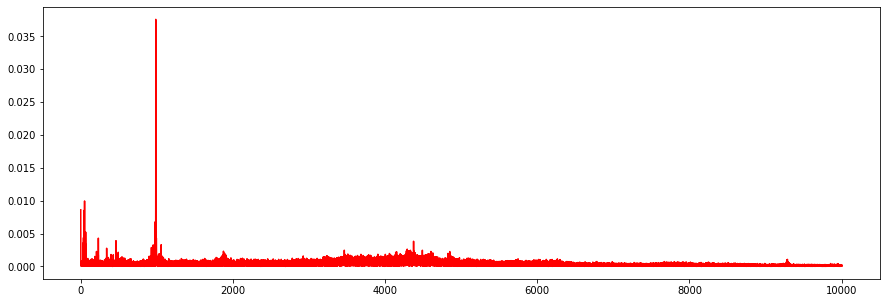

In [278]:
Na = len(am)
sr = 20000
fa = np.linspace(0, sr/2, Na//2)
plt.figure(figsize = [15,5])
plt.plot(fa,np.abs(af[:Na//2])*2*1.08/Na,'r')
# plt.xlim(970,1000)

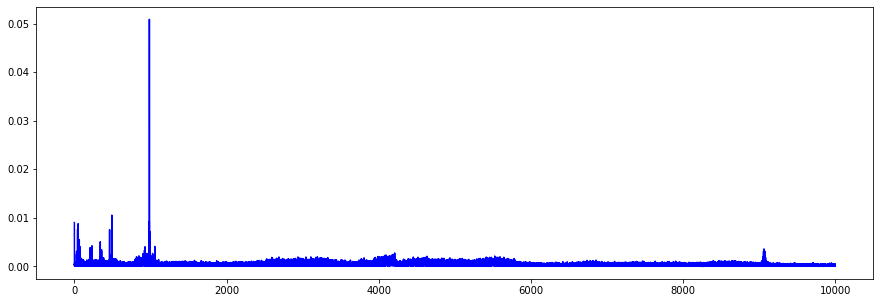

In [279]:
Nb = len(bm)
sr = 20000
fb = np.linspace(0, sr/2, Nb//2)
plt.figure(figsize = [15,5])
plt.plot(fb,np.abs(bf[:Nb//2])*2*1.08/Nb,'b')
# plt.xlim(9055,9070)

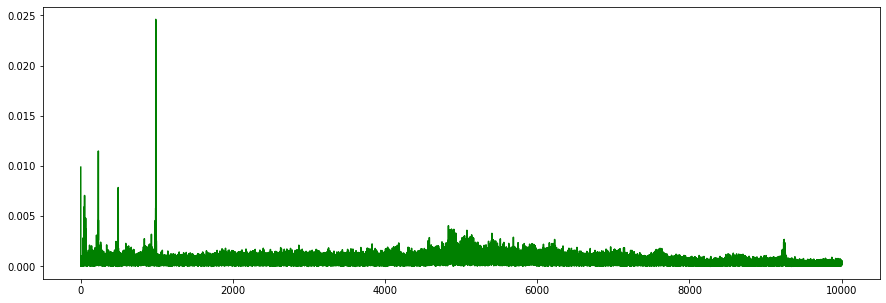

In [280]:
Nc = len(cm)
sr = 20000
fc = np.linspace(0, sr/2, Nc//2)
plt.figure(figsize = [15,5])
plt.plot(fc,np.abs(cf[:Nc//2])*2*1.08/Nc,'g')
# plt.xlim(9200,9300)

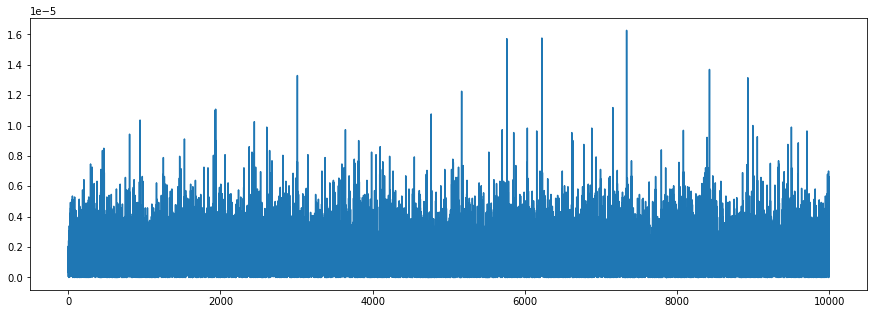

In [282]:
Nd = len(dm)
sr = 20000
fd = np.linspace(0, sr/2, Nd//2)
plt.figure(figsize = [15,5])
plt.plot(fd,np.abs(df[:Nd//2])*2*1.08/Nd)
# plt.ylim(0,0.02)

In [283]:
af1 = np.empty(0)
bf1 = np.empty(0)
cf1 = np.empty(0)
df1 = np.empty(0)
an = np.empty(0)
bn = np.empty(0)
cn = np.empty(0)
dn = np.empty(0)

In [284]:
directory = 'C:/Users/HP/2nd_test/end5'


for entry in islice(os.scandir(directory),5):
    if entry.is_file() and entry.name.endswith('.csv'):
        filepath = entry.path
        filepath = filepath.replace("\\","/")
#         print(filepath)
#         print(type((repr(entry.path))))
        df1 = pd.read_csv(filepath, sep = '\t', header = None)
        df1 = clean(df1)
        a1 = df1.iloc[:,0]
        b1 = df1.iloc[:,1]
        c1 = df1.iloc[:,2]
        d1 = df1.iloc[:,3]
#         a = np.array(a)
#         b = np.array(b)
#         c = np.array(c)
#         d = np.array(d)
        
        an=np.append(an,a)
        bn=np.append(bn,b)
        cn=np.append(cn,c)
        dn=np.append(dn,d)
    

In [285]:
af1=np.append(af1,(np.abs(np.fft.fft(an))))
bf1=np.append(bf1,(np.abs(np.fft.fft(bn))))
cf1=np.append(cf1,(np.abs(np.fft.fft(cn))))
df1=np.append(df1,(np.abs(np.fft.fft(dn))))

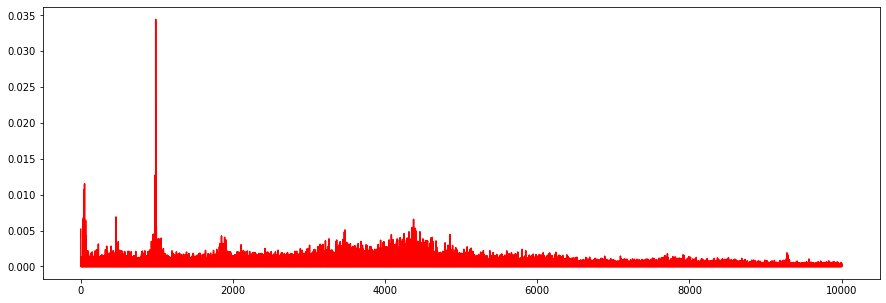

In [286]:
Na1 = len(an)
sr = 20000
fa1 = np.linspace(0, sr/2, Na1//2)
plt.figure(figsize = [15,5])
plt.plot(fa1,np.abs(af1[:Na1//2])*2*1.08/Na1,'r')
# plt.xlim(0,100)

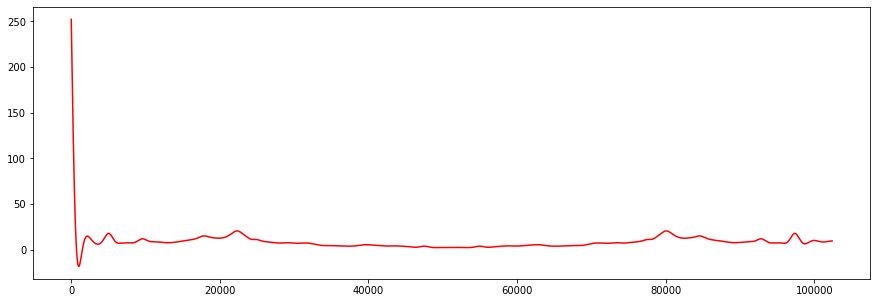

27

In [287]:
N = 3# Filter order
Wn = 0.001# Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A, np.abs(af1))
# plt.plot(s,'r-')
plt.figure(figsize = [15,5])
plt.plot(smooth_data,'r-')
# plt.xlim(2000,3000)
plt.show()
peaks = signal.find_peaks(smooth_data)
len(peaks[0])

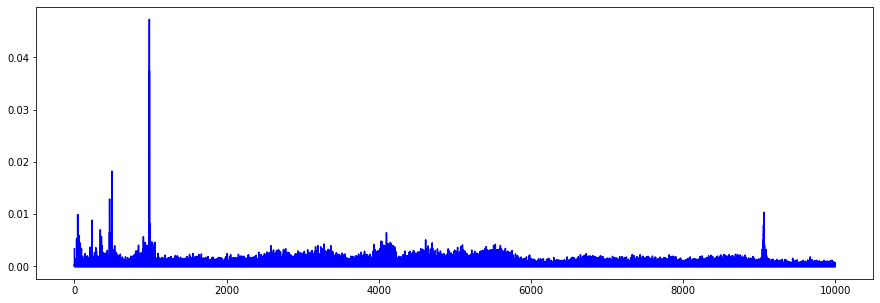

In [288]:
Nb1 = len(bn)
sr = 20000
fb1 = np.linspace(0, sr/2, Nb1//2)
plt.figure(figsize = [15,5])
plt.plot(fb1,np.abs(bf1[:Nb1//2])*2*1.08/Nb1,'b')
# plt.xlim(0,1000)

(9200.0, 9300.0)

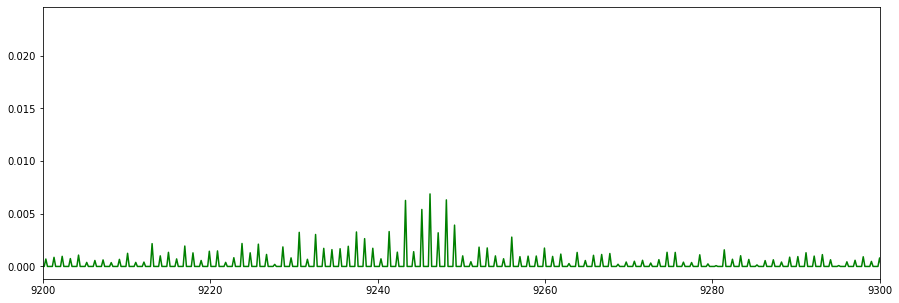

In [289]:
Nc1 = len(cn)
sr = 20000
fc1 = np.linspace(0, sr/2, Nc1//2)
plt.figure(figsize = [15,5])
plt.plot(fc1,np.abs(cf1[:Nc1//2])*2*1.08/Nc1,'g')
plt.xlim(9200,9300)

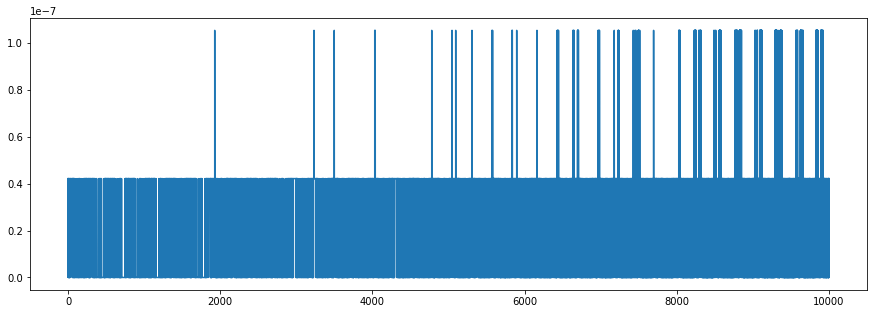

In [290]:
Nd1 = len(dn)
sr = 20000
fd1 = np.linspace(0, sr/2, Nd1//2)
plt.figure(figsize = [15,5])
plt.plot(fd1,np.abs(df1[:Nd1//2])*2*1.08/Nd1)
# plt.xlim(6000,6300)
# plt.ylim(0,0.02)

In [ ]:
def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)

In [ ]:
def capture(fftlist,freq):
    peaks = []
    for i in range(3,len(fftlist)-3):
        temp = np.array([fftlist[i-3],fftlist[i-2],fftlist[i-1],fftlist[i+1],fftlist[i+2],fftlist[i+3]])
        if(fftlist[i]>0.0068):
            peaks.append(freq[i])
    return peaks

In [ ]:
good_a = capture(np.abs(af[:Na//2])*2*1.08/Na,fa)
good_a = list(set([round(frequency) for frequency in good_a]))
good_a.sort()
good_a

In [ ]:
good_b = capture(np.abs(bf[:Nb//2])*2*1.08/Nb,fb)
good_b = list(set([round(frequency) for frequency in good_b]))
good_b.sort()
good_b

In [ ]:
good_c = capture(np.abs(cf[:Nc//2])*2*1.08/Nc,fc)
good_c = list(set([round(frequency) for frequency in good_c]))
good_c.sort()
good_c

In [ ]:
good_d = capture(np.abs(df[:Nd//2])*2*1.08/Nd,fd)
good_d = list(set([round(frequency) for frequency in good_d]))
good_d.sort()
good_d

In [ ]:
fault_a = capture(np.abs(af[:Na//2])*2*1.08/Na1,fa)
fault_a = list(set([round(frequency) for frequency in fault_a]))
fault_a.sort()
fault_a

In [ ]:
fault_b = capture(np.abs(bf[:Nb//2])*2*1.08/Nb,fb)
fault_b = list(set([round(frequency) for frequency in fault_b]))
fault_b.sort()
len(fault_b)

In [ ]:
fault_c = capture(np.abs(cf[:Nc//2])*2*1.08/Nc,fc)
fault_c = list(set([round(frequency) for frequency in fault_c]))
fault_c.sort()
len(fault_c)

In [ ]:
fault_d = capture(np.abs(df[:Nd//2])*2*1.08/Nd,fd)
fault_d = list(set([round(frequency) for frequency in fault_d]))
fault_d.sort()
fault_d

In [ ]:
def findPeaks(y):
    N = 1# Filter order
    Wn = 0.006# Cutoff frequency
    B, A = signal.butter(N, Wn, output='ba')
    smooth_data = signal.filtfilt(B,A, np.abs(y))
    # plt.plot(s,'r-')
    plt.figure(figsize = [15,5])
    plt.plot(smooth_data,'b-')
    # plt.xlim(2000,3000)
    plt.show()

    peaks = signal.find_peaks(smooth_data)
    return peaks[0]

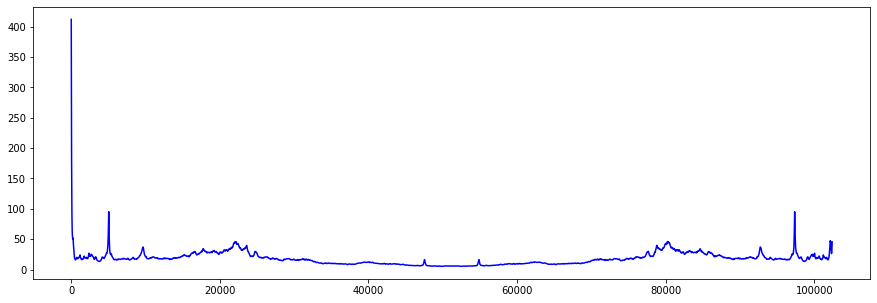

In [292]:
good_a1 = findPeaks(af)

In [293]:
fault_a1 = findPeaks()

TypeError: findPeaks() missing 1 required positional argument: 'y'